In [1]:
import pandas as pd

In [11]:
# load accuracy results
acc = pd.read_csv("/home/thanos/Documents/Thesis/Chord-Estimation-Thesis/src/metrics/results/mean_accuracies.csv", index_col="Unnamed: 0")
acc_smooth = pd.read_csv("/home/thanos/Documents/Thesis/Chord-Estimation-Thesis/src/metrics/results/mean_accuracies_smooth.csv", index_col="Unnamed: 0")
acc_sf = pd.read_csv("/home/thanos/Documents/Thesis/Chord-Estimation-Thesis/src/metrics/results/mean_accuracies_smooth_filter.csv", index_col="Unnamed: 0")

In [23]:
# Get the mean accuracy for each chord component
mean_acc = [acc[col].mean() for col in acc]
mean_acc_s = [acc_smooth[col].mean() for col in acc_smooth]
mean_acc_sf = [acc_sf[col].mean() for col in acc_sf]

categories = ['Root', 'Bass', 'Triad', 'Ext1', 'Ext2']  # Column actual names

# Plot Accuracy for vanilla and smoothed results

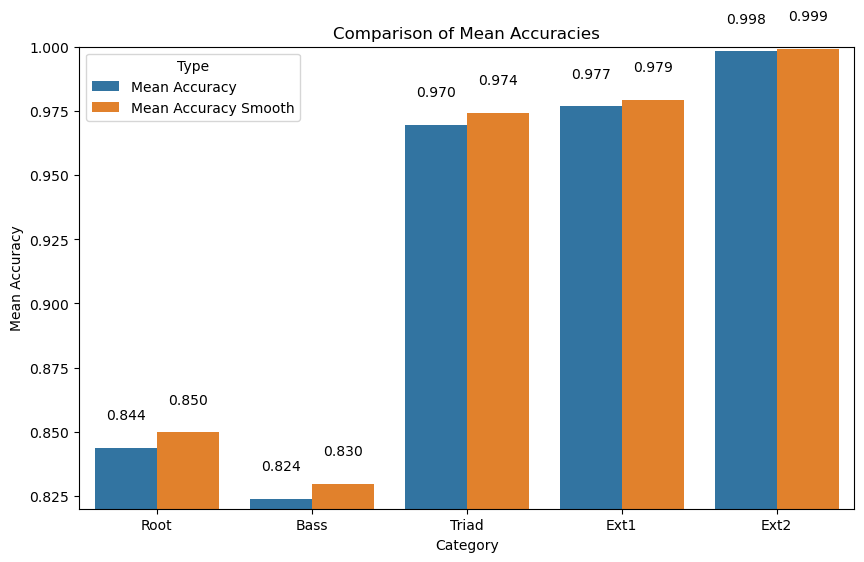

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'Category': categories * 2,
    'Mean Accuracy': mean_acc + mean_acc_s,
    'Type': ['Mean Accuracy'] * len(mean_acc) + ['Mean Accuracy Smooth'] * len(mean_acc_s)
})

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Mean Accuracy', hue='Type', data=data)

# Set the y-axis limits
ax.set_ylim(0.82, 1)

# Add the numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom')

plt.title('Comparison of Mean Accuracies')
plt.ylabel('Mean Accuracy')
plt.xlabel('Category')
plt.legend(title='Type')
plt.show()

# Also include Filtering

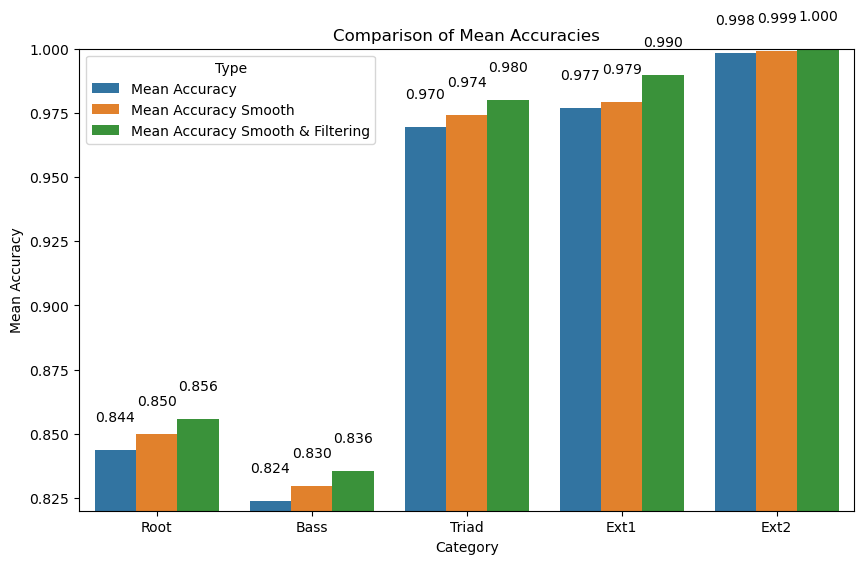

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add mean_acc_fs to your data
data = pd.DataFrame({
    'Category': categories * 3,
    'Mean Accuracy': mean_acc + mean_acc_s + mean_acc_sf,
    'Type': ['Mean Accuracy'] * len(mean_acc) + ['Mean Accuracy Smooth'] * len(mean_acc_s) + ['Mean Accuracy Smooth & Filtering'] * len(mean_acc_sf)
})

# Create the barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Category', y='Mean Accuracy', hue='Type', data=data)

# Set the y-axis limits
ax.set_ylim(0.82, 1)

# Add the numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom')

plt.title('Comparison of Mean Accuracies')
plt.ylabel('Mean Accuracy')
plt.xlabel('Category')
plt.legend(title='Type')
plt.show()

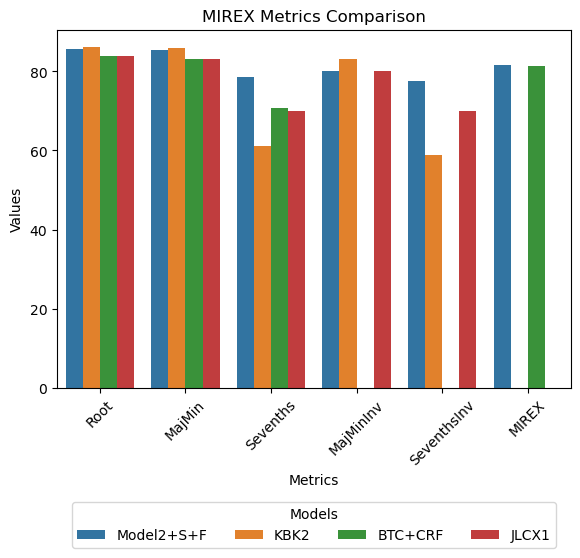

In [9]:
# Define the data
data = {
    'Metrics': ['Root', 'MajMin', 'Sevenths', 'MajMinInv', 'SeventhsInv', 'MIREX'],
    'Model2+S+F': [85.6, 85.4, 78.5, 80.1, 77.7, 81.6],
    'KBK2': [86.30, 86.02, 61.12, 83.12, 58.75, None],
    'BTC+CRF': [83.9, 83.1, 70.7, None, None, 81.4],
    'JLCX1': [83.8, 83.1, 70.1, 80.1, 70.0, None]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long format for plotting
df_melted = pd.melt(df, id_vars='Metrics', var_name='Models', value_name='Values')

# Plot
plt.figure(figsize=(6, 6))
sns.barplot(x='Metrics', y='Values', hue='Models', data=df_melted)
plt.title('MIREX Metrics Comparison')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend(title='Models', bbox_to_anchor=(0.5, -0.3), loc='upper center', ncol=4)
plt.tight_layout()
plt.show()
